# Question3  in chapter2

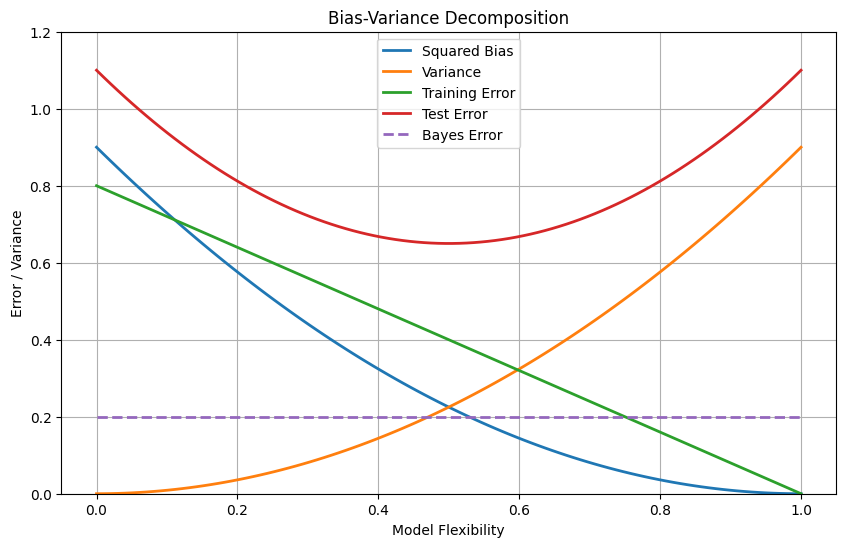

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for model flexibility (x-axis)
flexibility = np.linspace(0, 1, 100)

# Define the curves
squared_bias = 0.9 * (1 - flexibility)**2  # Decreasing curve
variance = 0.9 * flexibility**2  # Increasing curve
training_error = 0.8 * (1 - flexibility)  # Decreasing curve
# Test error: U-shaped (sum of bias, variance, and some irreducible error)
test_error = squared_bias + variance + 0.2
bayes_error = 0.2 * np.ones_like(flexibility)  # Constant

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(flexibility, squared_bias, label='Squared Bias', color='#1f77b4', linewidth=2)
plt.plot(flexibility, variance, label='Variance', color='#ff7f0e', linewidth=2)
plt.plot(flexibility, training_error, label='Training Error', color='#2ca02c', linewidth=2)
plt.plot(flexibility, test_error, label='Test Error', color='#d62728', linewidth=2)
plt.plot(flexibility, bayes_error, label='Bayes Error', color='#9467bd', linestyle='--', linewidth=2)

# Customize the plot
plt.xlabel('Model Flexibility')
plt.ylabel('Error / Variance')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.2)

# Show the plot
plt.show()


# QUESTION 8 IN CHAPTER 2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# (a) Read the data into Python
college = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data_Mining_Docs\ALL_CSV_FILES\College.csv')

In [7]:
# Rename 'Unnamed: 0' to 'College' and set as index
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

In [8]:
# Keep modified version
college = college3

In [9]:
# (c) Numerical summary of variables
print(college.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

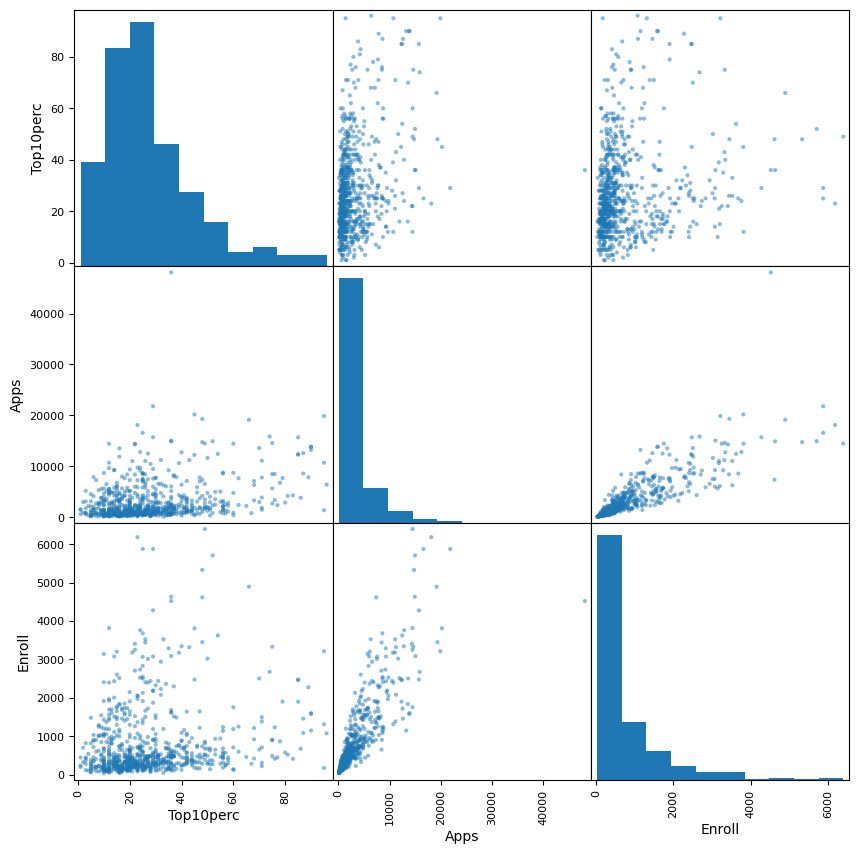

In [10]:
# (d) Scatterplot matrix for Top10perc, Apps, Enroll
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']], figsize=(10, 10))
plt.show()

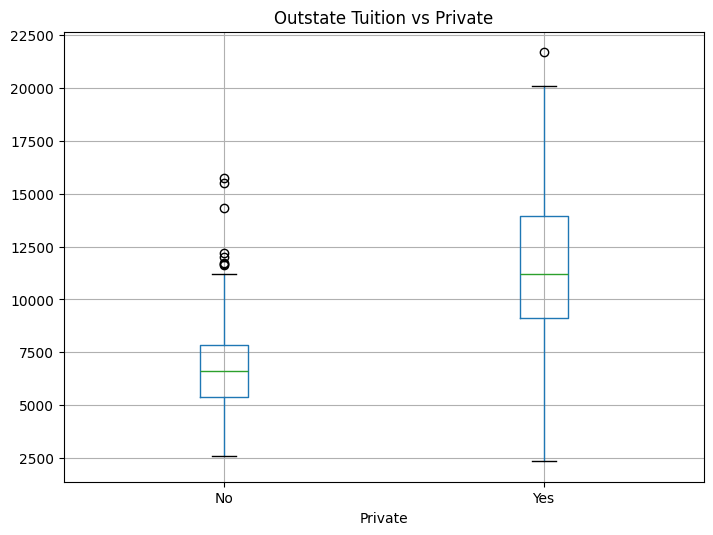

In [11]:
# (e) Boxplot of Outstate vs Private
college.boxplot(column='Outstate', by='Private', figsize=(8, 6))
plt.title('Outstate Tuition vs Private')
plt.suptitle('')
plt.show()

Elite
No     699
Yes     78
Name: count, dtype: int64


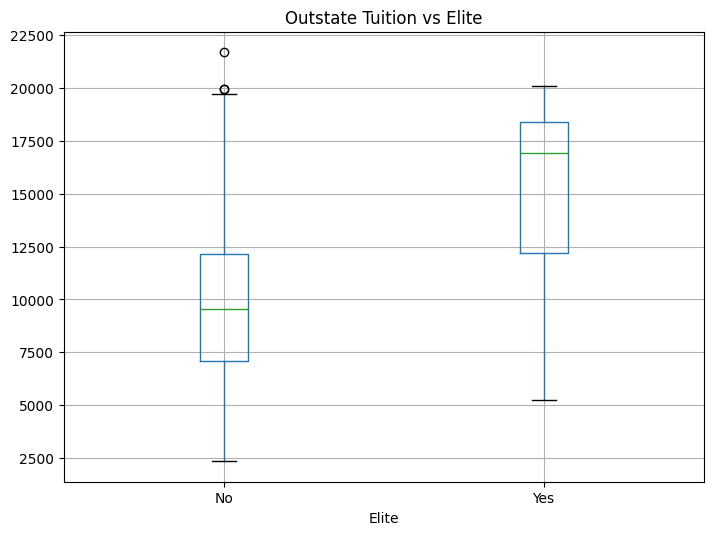

In [12]:
# (f) Create Elite variable and boxplot of Outstate vs Elite
college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels=['No', 'Yes'])
print(college['Elite'].value_counts())
college.boxplot(column='Outstate', by='Elite', figsize=(8, 6))
plt.title('Outstate Tuition vs Elite')
plt.suptitle('')
plt.show()

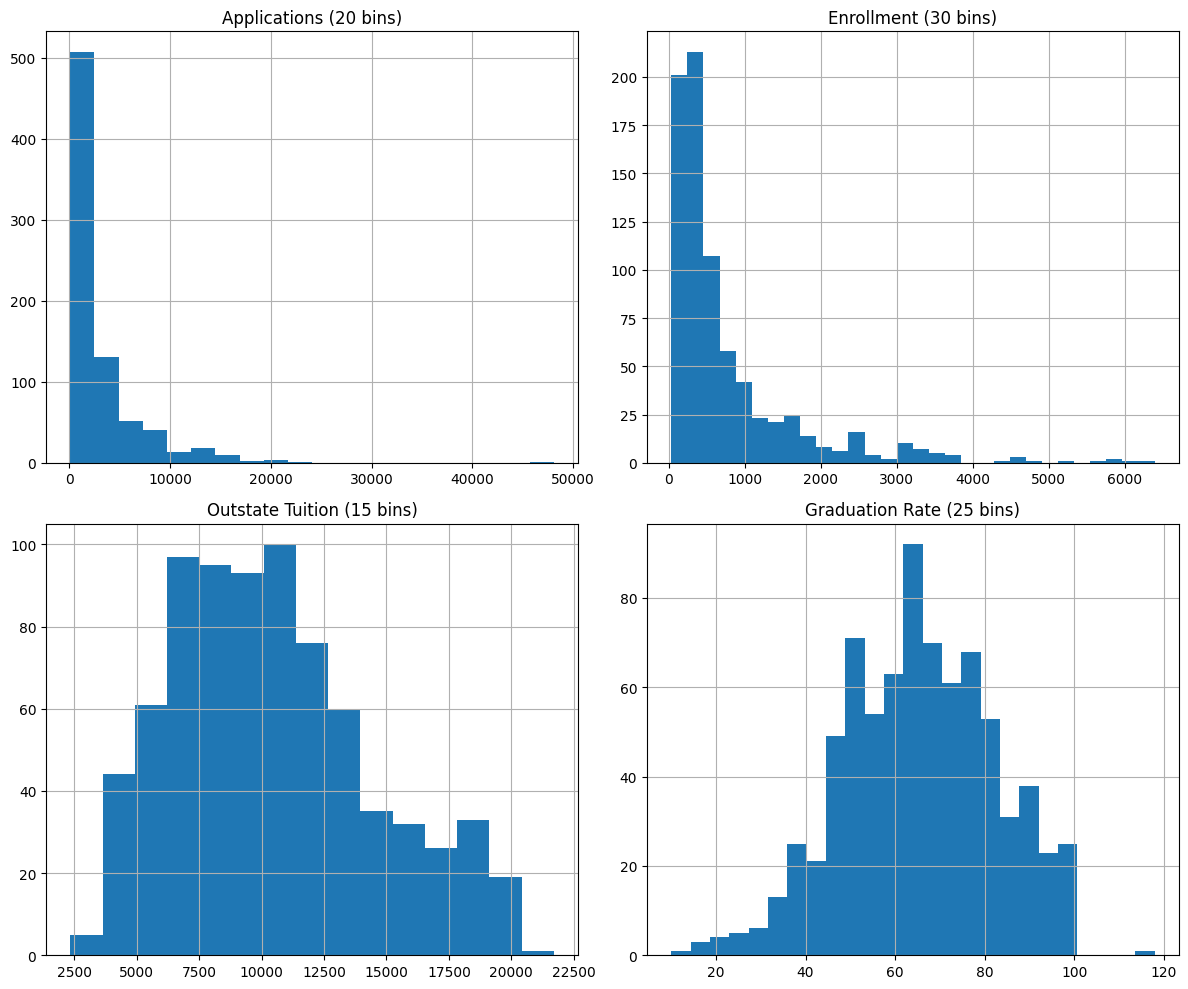

In [13]:
# (g) Histograms for quantitative variables with different bins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
college['Apps'].hist(bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Applications (20 bins)')
college['Enroll'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Enrollment (30 bins)')
college['Outstate'].hist(bins=15, ax=axes[1, 0])
axes[1, 0].set_title('Outstate Tuition (15 bins)')
college['Grad.Rate'].hist(bins=25, ax=axes[1, 1])
axes[1, 1].set_title('Graduation Rate (25 bins)')
plt.tight_layout()
plt.show()

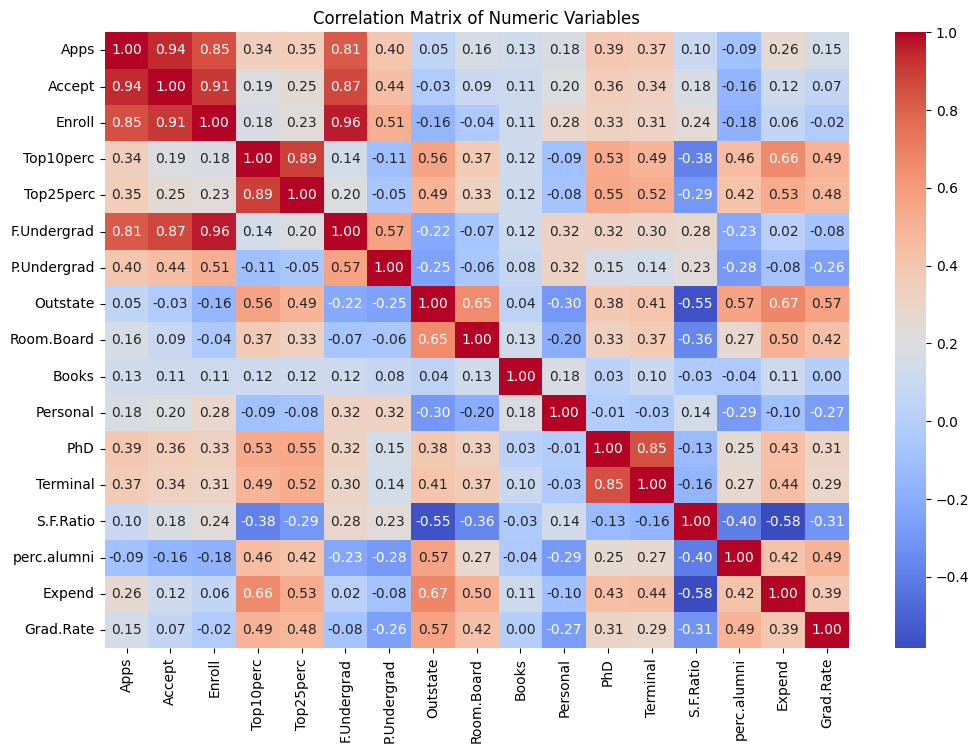

In [14]:
# (h) Further exploration
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(college.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [15]:
# Summary statistics for private vs public
print(college.groupby('Private')[['Outstate', 'Grad.Rate', 'Top10perc']].mean())

             Outstate  Grad.Rate  Top10perc
Private                                    
No        6813.410377  56.042453  22.834906
Yes      11801.693805  68.998230  29.330973


## Question8 Chapter3

In [17]:
!pip install statsmodels


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Step 1: Setup and Load Dataset

In [19]:
# Load the Auto dataset
auto = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data_Mining_Docs\ALL_CSV_FILES\Auto.csv')

In [20]:
# Display first few rows
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Step 2: (a) Perform Simple Linear Regression

In [22]:
print(auto.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [23]:
print(auto['horsepower'].unique())


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [24]:
auto = auto[auto['horsepower'] != '?']  # Remove rows with '?'
auto['horsepower'] = auto['horsepower'].astype(float)  # Convert to numeric


In [25]:
# i. Fit the model

X = sm.add_constant(auto['horsepower'])  # add intercept
y = auto['mpg']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        22:18:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## ii. Comment on the Output
### P-value of horsepower → If it's small (e.g., < 0.05), there's a significant relationship.

### R-squared → Measures the strength (e.g., closer to 1 is stronger).

### Coefficient sign → Negative or positive indicates direction of the relationship.

In [28]:
# iii. Predict mpg for horsepower = 98 and give 95% confidence & prediction interval
new_data = pd.DataFrame([[1, 98]], columns=X.columns)  # same column order as model
prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)  # 95% CI
prediction_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


# Step 3: (b) Plot the regression line

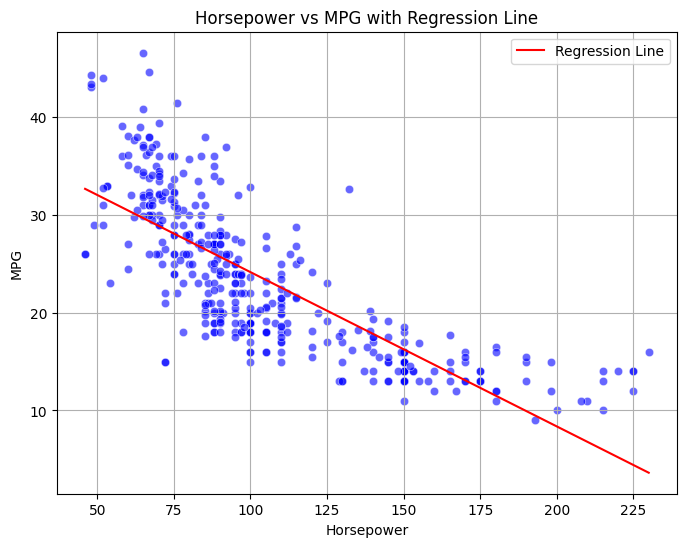

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=auto, color='blue', alpha=0.6)

# Regression line
x_vals = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
y_vals = model.params['const'] + model.params['horsepower'] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG with Regression Line")
plt.legend()
plt.grid(True)
plt.show()


# Step 4: (c) Diagnostic Plots

### Residuals vs Fitted

### Q-Q plot

### Scale-Location

### Residuals vs Leverage

In [30]:
# Residuals
residuals = model.resid
fitted = model.fittedvalues

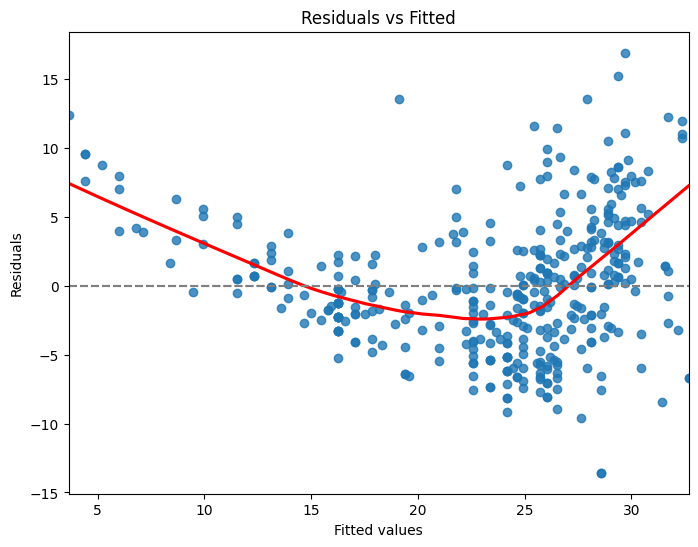

In [31]:
# Residuals vs Fitted
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

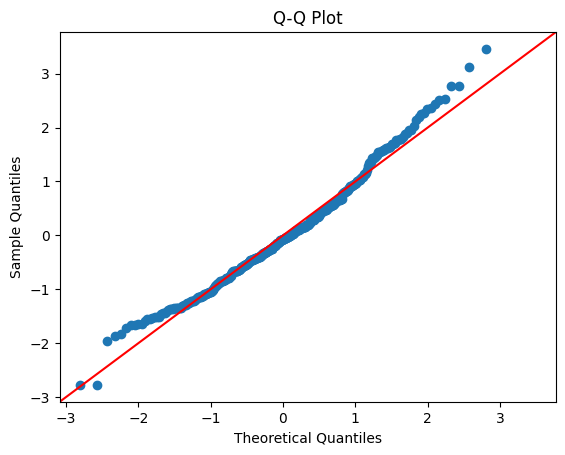

In [32]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

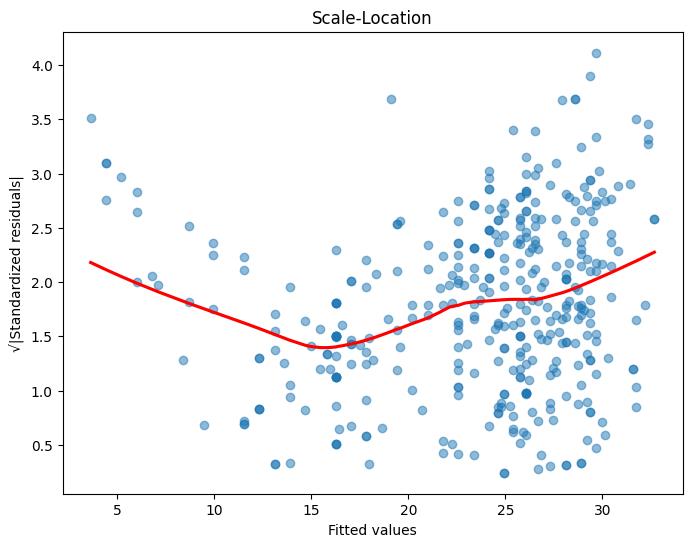

In [33]:
# Scale-Location Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.5)
sns.regplot(x=fitted, y=np.sqrt(np.abs(residuals)), scatter=False, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized residuals|")
plt.title("Scale-Location")
plt.show()

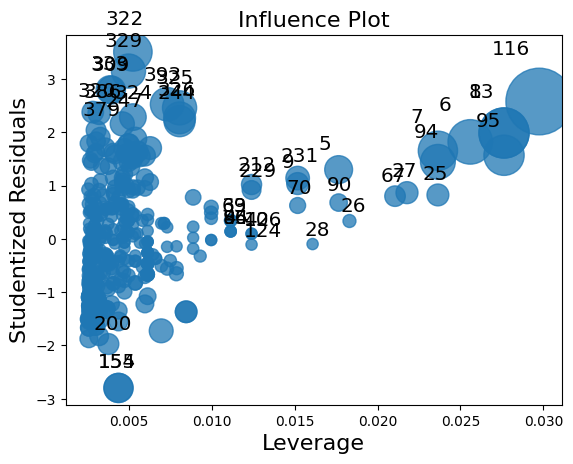

In [34]:
# Leverage Plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.show()

# Interpreting Problems from the Diagnostic Plots

### If residuals show patterns (not random): linearity assumption violated.

### If Q-Q plot deviates from line: residuals not normally distributed.

### If points in influence plot are far away: those are influential points.

# chapter3, Question 13 – Simulated Linear Regression

### NumPy for simulation

### Matplotlib/Seaborn for visualization

### statsmodels for regression analysis

# (a) Generate vector x

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(1)

# Generate 100 samples from N(0,1)
x = np.random.normal(0, 1, 100)
print("First 5 values of x:", x[:5])


First 5 values of x: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


# (b) Generate error vector eps from N(0, 0.25)

In [36]:
# Variance = 0.25 -> std deviation = sqrt(0.25) = 0.5
eps = np.random.normal(0, 0.5, 100)
print("First 5 values of eps:", eps[:5])


First 5 values of eps: [-0.22356428  0.61225385  0.20174582  0.29678926 -0.54745592]


# (c) Generate y using model: 
# 𝑌 = −1 + 0.5𝑋 + 𝜖


In [38]:
# Create y
y = -1 + 0.5 * x + eps

# Display the first few values
print("First 5 values of y:", y[:5])
print("Length of y:", len(y))

# β₀ = -1, β₁ = 0.5 are the true model parameters.


First 5 values of y: [-0.4113916  -0.69362435 -1.06234006 -1.23969505 -1.11475211]
Length of y: 100


# (d) Scatterplot of x vs y

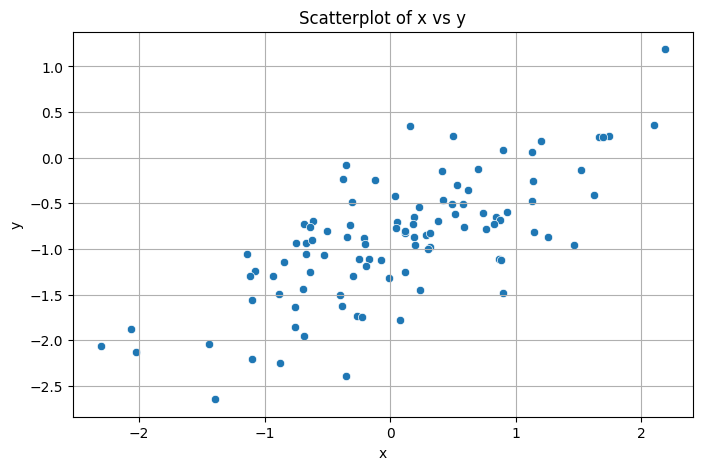

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')
plt.grid(True)
plt.show()


# (e) Fit Linear Model y ~ x and compare coefficients

In [40]:
# Prepare data
X = sm.add_constant(x)  # adds intercept β₀
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.20e-17
Time:                        23:12:49   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

# (f) Plot the regression line and the true population line

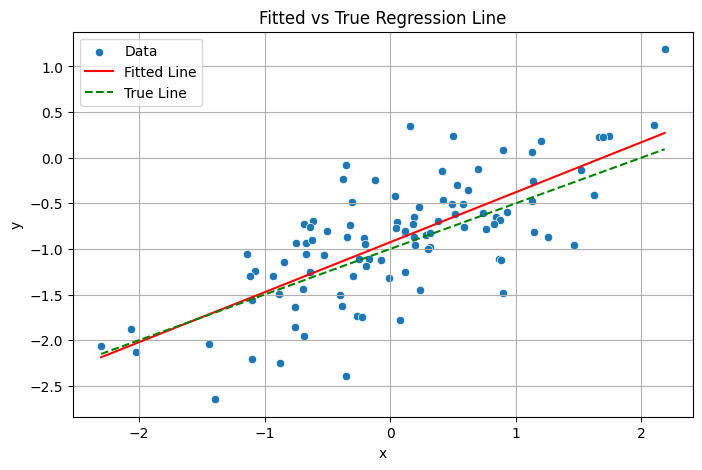

In [41]:
# Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, label="Data")

# Fitted line (from model)
x_vals = np.linspace(min(x), max(x), 100)
y_hat = model.params[0] + model.params[1] * x_vals
plt.plot(x_vals, y_hat, color='red', label="Fitted Line")

# True population line: y = -1 + 0.5 * x
y_true = -1 + 0.5 * x_vals
plt.plot(x_vals, y_true, color='green', linestyle='--', label="True Line")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitted vs True Regression Line")
plt.legend()
plt.grid(True)
plt.show()


# (g) Fit Polynomial Regression Model: y ~ x + x^2

In [42]:
# Create x^2
x2 = x ** 2
X_poly = np.column_stack((x, x2))
X_poly = sm.add_constant(X_poly)

# Fit model
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.83e-16
Time:                        23:15:43   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

### Check the p-value for the x^2 term:

#### If it’s small (< 0.05), quadratic term improves the fit.

#### If not, then the linear model is sufficient.

# (h) Reduce noise in eps (variance from 0.25 → 0.01)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1636.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           5.93e-63
Time:                        23:19:56   Log-Likelihood:                 82.510
No. Observations:                 100   AIC:                            -161.0
Df Residuals:                      98   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0014      0.011    -93.278      0.0

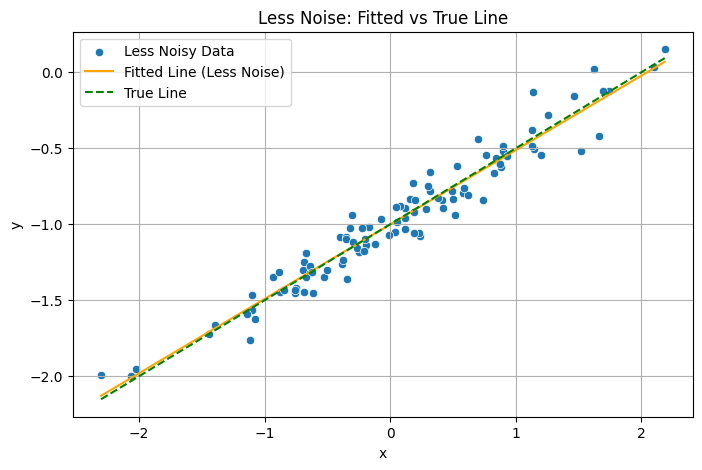

In [44]:
# New eps with smaller noise
eps_new = np.random.normal(0, 0.1, 100)  # std dev = sqrt(0.01)
y_new = -1 + 0.5 * x + eps_new

# Re-fit linear model with less noise
X_new = sm.add_constant(x)
model_new = sm.OLS(y_new, X_new).fit()
print(model_new.summary())

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_new, label="Less Noisy Data")
y_hat_new = model_new.params[0] + model_new.params[1] * x_vals
plt.plot(x_vals, y_hat_new, color='orange', label="Fitted Line (Less Noise)")
plt.plot(x_vals, -1 + 0.5 * x_vals, 'g--', label="True Line")
plt.legend()
plt.grid(True)
plt.title("Less Noise: Fitted vs True Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Result: With less noise, the fitted line is closer to the true model.


# **(i) Repeat (a)–(f) with more noise

### We keep the same linear model:
### 𝑌=−1+0.5𝑋+𝜖
### But now, the variance of ϵ increases (e.g., from 0.25 to 1.0, meaning std deviation = 1.0).



In [45]:
# Generate more noisy eps: variance = 1 -> std dev = 1
eps_more = np.random.normal(0, 1.0, 100)

# Generate new y with more noise
y_more = -1 + 0.5 * x + eps_more


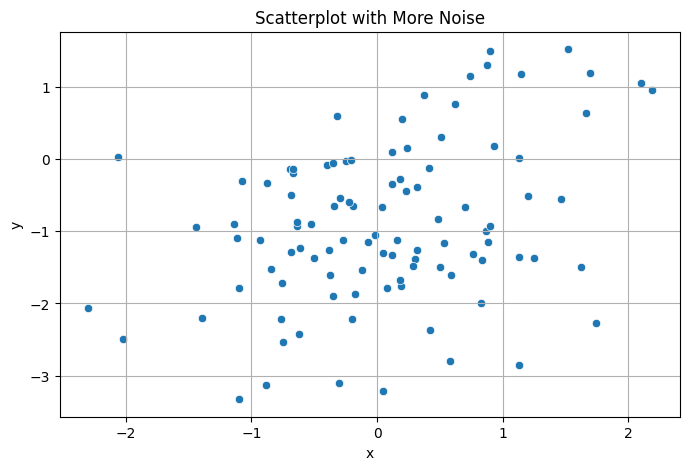

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_more)
plt.title("Scatterplot with More Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [47]:
X_more = sm.add_constant(x)
model_more = sm.OLS(y_more, X_more).fit()
print(model_more.summary())

# Compare β̂₀, β̂₁ to true values. The estimates will now likely have larger standard errors and lower R².


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.27
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000272
Time:                        23:23:44   Log-Likelihood:                -145.28
No. Observations:                 100   AIC:                             294.6
Df Residuals:                      98   BIC:                             299.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9324      0.105     -8.902      0.0

# Plot fitted line vs true line


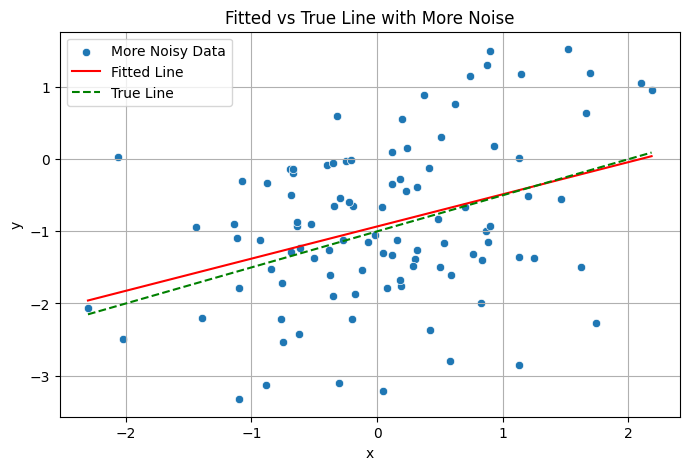

In [48]:
# Scatter + fitted line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y_more, label="More Noisy Data")

# Fitted line
y_hat_more = model_more.params[0] + model_more.params[1] * x_vals
plt.plot(x_vals, y_hat_more, color='red', label="Fitted Line")

# True line
y_true = -1 + 0.5 * x_vals
plt.plot(x_vals, y_true, 'g--', label="True Line")

plt.title("Fitted vs True Line with More Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (j) Compare Confidence Intervals

### Let’s extract 95% confidence intervals for β₀ and β₁ from:

### The original model

### The less noisy model

### The more noisy model

# Get confidence intervals

In [50]:
# Original
ci_original = model.conf_int()
# Less noise
ci_less = model_new.conf_int()
# More noise
ci_more = model_more.conf_int()

# Combine into DataFrame for comparison
ci_compare = pd.DataFrame({
    'Original β0': ci_original[0],
    'Original β1': ci_original[1],
    'Less Noise β0': ci_less[0],
    'Less Noise β1': ci_less[1],
    'More Noise β0': ci_more[0],
    'More Noise β1': ci_more[1]
})
ci_compare.index = ['Lower Bound', 'Upper Bound']
print(ci_compare.T)


               Lower Bound  Upper Bound
Original β0      -1.019741    -0.833246
Original β1       0.442613     0.652814
Less Noise β0    -1.022701    -0.980092
Less Noise β1     0.465422     0.513447
More Noise β0    -1.140231    -0.724525
More Noise β1     0.211675     0.680220


# Comment on Results:

## Interpretation:

### Less Noise:

##### Confidence intervals are narrower → estimates are more precise.

##### Coefficients are closer to true values.

#### More Noise:

##### Confidence intervals are wider → more uncertainty.

##### Slope may deviate more from 0.5 and intercept from -1.

##### R² is lower, indicating weaker fit.